In [406]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [407]:
df = pd.read_csv('/content/drive//MyDrive/code/Data_Set/amazon.csv', parse_dates= ['date'])
df = pd.DataFrame(df)

In [408]:
#3. Check data type of each column
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [409]:
#4. Display top 5 rows of the dataset.
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [410]:
#5. Check last 5 rows.
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [411]:
#6. Find shape of our dataset (number of rows and number of columns).
print(f'Columns: {df.shape[1]}')
print(f'Rows: {df.shape[0]}')

Columns: 5
Rows: 6454


In [412]:
# 7. Getting information about our dataset like total number rows, total number of columns,
# datatypes of each column and memory requirement.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [413]:
#8. Check for duplicate data and drop them.
# False is 0, true is 1 
df.duplicated().sum()

32

In [414]:
df = df[~df.duplicated(keep='first')]
print('After duplicates removed, 32 duplicates')
print(f'Columns: {df.shape[1]}')
print(f'Rows: {df.shape[0]}')

After duplicates removed, 32 duplicates
Columns: 5
Rows: 6422


In [415]:
#9. Check null values in the dataset
df.isnull().sum() # No null values

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [416]:
#10. Get overall statistics about the data frame
df.describe(include = 'all', datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [417]:
#11. Rename month names to english.
df.groupby('month').count().index

Index(['Abril', 'Agosto', 'Dezembro', 'Fevereiro', 'Janeiro', 'Julho', 'Junho',
       'Maio', 'Mar�o', 'Novembro', 'Outubro', 'Setembro'],
      dtype='object', name='month')

In [418]:
def to_english(month):
  portuguese_months = ['janeiro','fevereiro', 'mar�o','abril',
                      'maio', 'junho', 'julho','agosto',
                      'setembro', 'outubro',  'novembro', 'dezembro']
  english_month = ['January', 'February', 'March', 'April',
                   'May', 'June', 'July', 'August', 'September',
                   'October', 'November', 'December']
  return english_month[portuguese_months.index(month.lower())]

In [419]:
df['eng_month']=df.month.apply(to_english)
df

,year,state,month,number,date,eng_month
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,December
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,December
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,December
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,December


In [420]:
#12. Total number of fires registered.
df['number'].sum()

698811.073

In [421]:
def fraction(number):
  frac = number - int(number)
  return frac

df['fraction']=df.number.apply(fraction)
df.head()

,year,state,month,number,date,eng_month,fraction
0,1998,Acre,Janeiro,0.0,1998-01-01,January,0.0
1,1999,Acre,Janeiro,0.0,1999-01-01,January,0.0
2,2000,Acre,Janeiro,0.0,2000-01-01,January,0.0
3,2001,Acre,Janeiro,0.0,2001-01-01,January,0.0
4,2002,Acre,Janeiro,0.0,2002-01-01,January,0.0


fraction
0.000    5598
0.484       5
0.255       5
0.339       4
0.081       4
0.787       4
0.218       4
0.161       4
0.795       3
0.096       3
Name: number, dtype: int64
The fractions add up to 373.073.


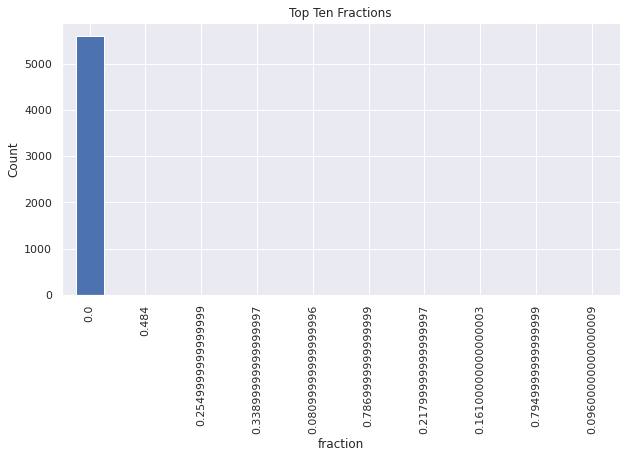

In [422]:
df.groupby(by='fraction')\
  .count()['number']\
  .sort_values( ascending=False)\
  .head(10)\
  .plot(kind='bar', title = 'Top Ten Fractions', ylabel = 'Count', figsize = (10,5))
print(df.groupby('fraction')\
  .count()['number']\
  .sort_values( ascending=False)\
  .head(10))
print(f"The fractions add up to {df['fraction'].sum()}.")

It appears not all fires are considered a whole fire. Above shows the top ten non-whole numbers. If added together the fractions add up to about 373 fires. 

In [423]:
def month_to_num(month):
  english_month = ['January', 'February', 'March', 'April',
                   'May', 'June', 'July', 'August', 'September',
                   'October', 'November', 'December']
  return english_month.index(month)
df['month_num']=df.eng_month.apply(month_to_num)

eng_month
January      47681.844
February     30839.050
March        30709.405
April        28184.770
May          34725.363
June         55997.675
July         92319.113
August       88050.435
September    58578.305
October      88681.579
November     85508.054
December     57535.480
Name: number, dtype: float64

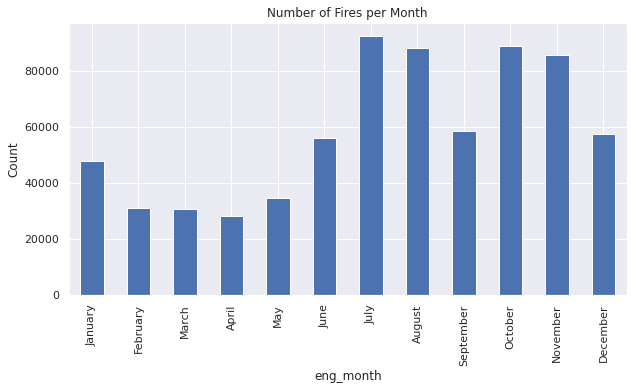

In [424]:
#13. In which month maximum number of forest fires were reported?
month_fires = df.loc[df.number != 0].groupby('eng_month')\
  .sum()[['number', 'month_num']].sort_values('month_num')
month_fires['number'].plot.bar( title = 'Number of Fires per Month',xlabel = 'eng_month', ylabel = 'Count', figsize = (10,5))
month_fires['number']

Fires per month. July has the mos fires, while April has the least. 

In [425]:
def get_year(date):
  return date.year

df['year']=df.date.apply(get_year)
df

,year,state,month,number,date,eng_month,fraction,month_num
0,1998,Acre,Janeiro,0.0,1998-01-01,January,0.0,0
1,1999,Acre,Janeiro,0.0,1999-01-01,January,0.0,0
2,2000,Acre,Janeiro,0.0,2000-01-01,January,0.0,0
3,2001,Acre,Janeiro,0.0,2001-01-01,January,0.0,0
4,2002,Acre,Janeiro,0.0,2002-01-01,January,0.0,0
...,...,...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,December,0.0,11
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,December,0.0,11
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,December,0.0,11
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,December,0.0,11


In [426]:
#14. In which year maximum number of forest fires was reported?
df.loc[df.number != 0].groupby('year')\
  .sum()['number'].sort_values(ascending=False).head(1)

year
2003    42760.674
Name: number, dtype: float64

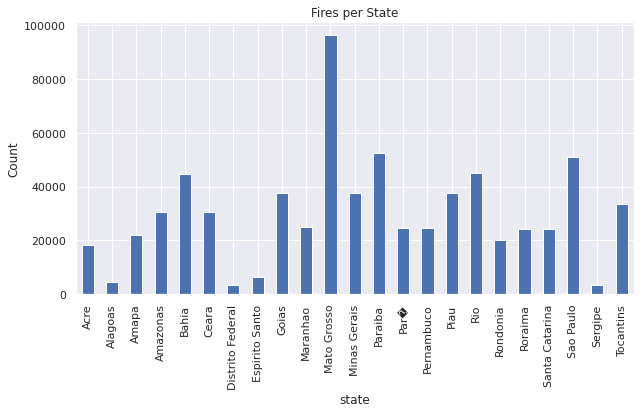

In [427]:
#15. In which state maximum number of forest fires was reported?
state_fire = df.loc[df.number != 0].groupby('state').sum()['number']
state_fire.plot.bar( title = 'Fires per State', ylabel = 'Count', figsize = (10,5))

Manto Grosso has the most fires. 

In [428]:
#16. Find total number of fires were reported in amazonas (state of brazil)
state_fire.loc[state_fire.index == 'Amazonas']

state
Amazonas    30650.129
Name: number, dtype: float64

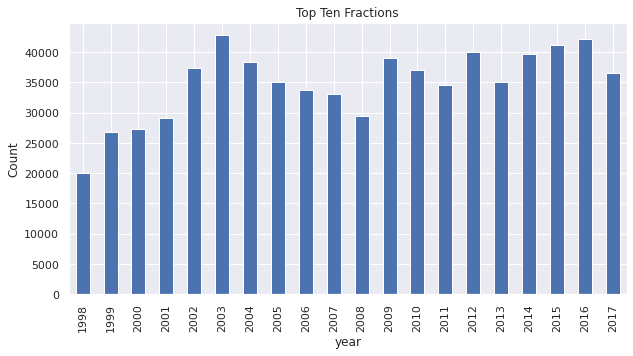

In [429]:
#17. Display number of fires were reported in amazon (year-wise)
year_fires = df.loc[df.number != 0].groupby('year')\
  .sum()['number']
year_fires.plot.bar( title = 'Top Ten Fractions', ylabel = 'Count', figsize = (10,5))

2003 has the most fires, while 1998 has the least

In [430]:
#18. Display number of fires were reported in amazon (day-wise)
def get_day_of_week(date):
  day = ['Monday','Tuesday', 'Wednesday', 'Thursday', 
         'Friday', 'Saturday', 'Sunday']
  return day[date.weekday()]
df['day_of_week']=df.date.apply(get_day_of_week)

#make sorting easier
def get_day_of_week_index(date):
  day = ['Monday','Tuesday', 'Wednesday', 'Thursday', 
         'Friday', 'Saturday', 'Sunday']
  return date.weekday()
df['day_of_week_index']=df.date.apply(get_day_of_week_index)

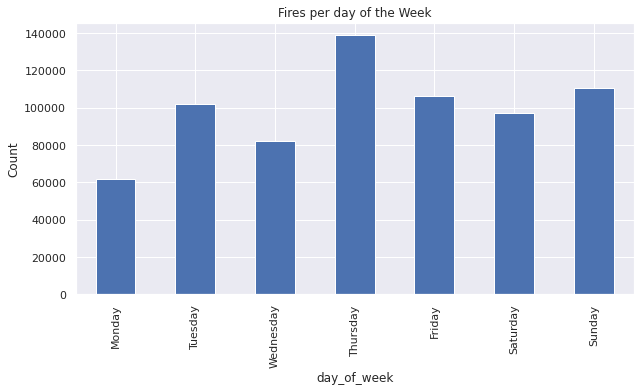

In [431]:
week_df =df.loc[df.number != 0].groupby('day_of_week')\
            .sum()[['number','day_of_week_index']]\
            .sort_values('day_of_week_index')

week_df['number'].plot.bar( title = 'Fires per day of the Week',
                           ylabel = 'Count', figsize = (10,5))

Thursday has the most fires, while Monday has the least. However since all data is entered on the first of the year, this statistic is not valid. 

Total Fires in 2015: 41208.292


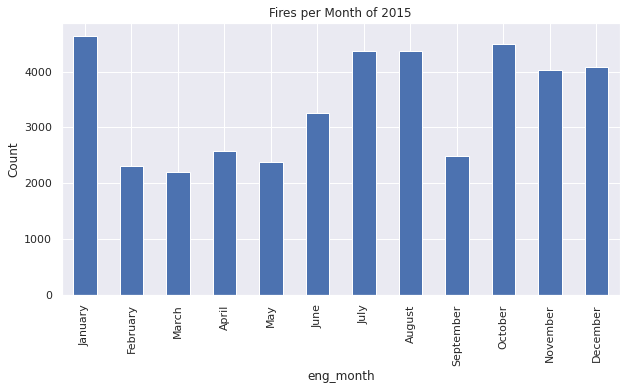

In [432]:
#19. Find total number of fires were reported in 2015 and visualize data based on each ‘month’.
print(f"Total Fires in 2015: {df.loc[(df.number != 0) & (df.year == 2015)]['number'].sum()}")
month_2015_df = df.loc[(df.number != 0) & (df.year == 2015)]\
  .groupby('eng_month').sum()[['number', 'month_num']].sort_values('month_num')
month_2015_df['number'].plot.bar( title = 'Fires per Month of 2015',
                                 ylabel = 'Count', figsize = (10,5))

January has the most fires, with March having the least for 2015.

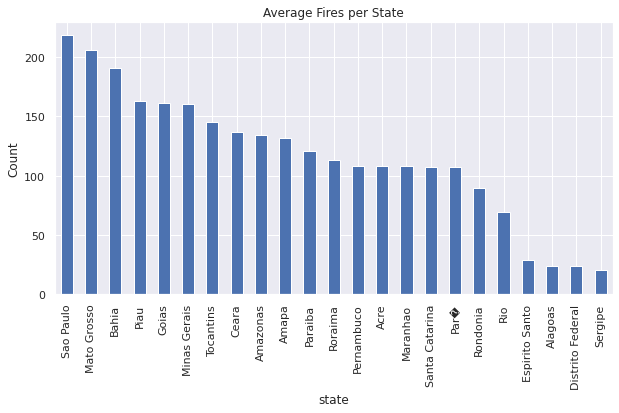

In [433]:
#20. Find average number of fires were reported from highest to lowest (state-wise)
state_fire_avg = state_fire/df.loc[df.number != 0].groupby('state').count()['number']
state_fire_avg = state_fire_avg.sort_values(ascending = False)
state_fire_avg.plot.bar( title = 'Average Fires per State',
                        ylabel = 'Count', figsize = (10,5))

Sao Paulo has the most fires by average.

state
Acre                  47.000
Alagoas              964.000
Amapa               4504.000
Amazonas            2224.000
Bahia               4559.408
Ceara               5251.183
Distrito Federal       5.000
Espirito Santo       239.000
Goias               1007.000
Maranhao             833.685
Mato Grosso         7594.773
Minas Gerais        1987.000
Paraiba             4222.000
Par�                2190.321
Pernambuco          3340.000
Piau                7030.000
Rio                 3713.110
Rondonia            1573.000
Roraima             2377.000
Santa Catarina       789.000
Sao Paulo           1009.000
Sergipe              527.000
Tocantins           1549.000
Name: number, dtype: float64

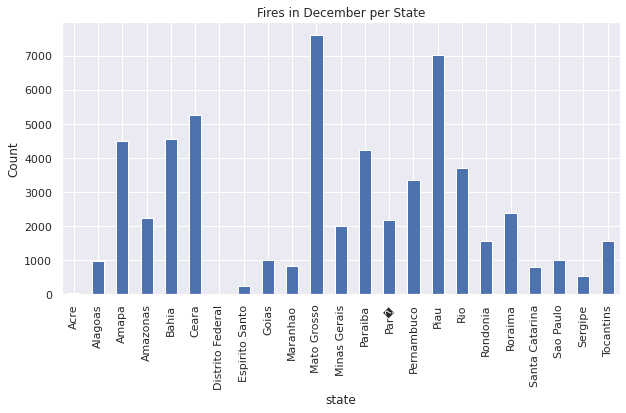

In [434]:
#21. To find the state names where fires were reported in 'dec' month.
dec_fires = df.loc[(df.number != 0) & (df.eng_month == 'December')]\
              .groupby('state')['number'].sum()
dec_fires.plot.bar(title = 'Fires in December per State', ylabel = 'Count', figsize = (10,5))
dec_fires

Mato Grosso Has the most fires in the month of Dec.

#Extra

In [435]:
#get only the date into a yyyy-mm-dd instead of yyyy-mm-ddthh:mm:ss
def get_day(date):
  return date.date()
df['date']=df.date.apply(get_day)

Text(0, 0.5, 'Number of Fires Brazil')

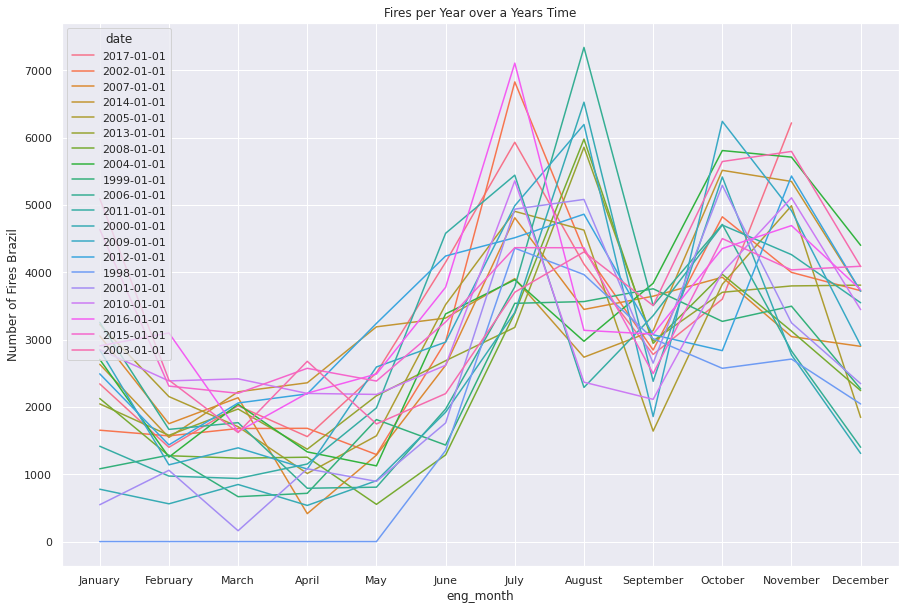

In [436]:
#Comaprison through the months over the years
year_df = pd.DataFrame(df.groupby(['date', 'eng_month', 'month_num', 'year'])['number'].sum())
year_df = year_df.sort_values('month_num')
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=year_df, x='eng_month', y= 'number', hue='date')\
    .set(title='Fires per Year over a Years Time')
plt.ylabel('Number of Fires Brazil')

Comparison of the fires over the years. it is possible to see that the peak fire seasons are aroung June - August, and October - November, and beginning January.  

[Text(0.5, 1.0, 'Fires per Year over the Years')]

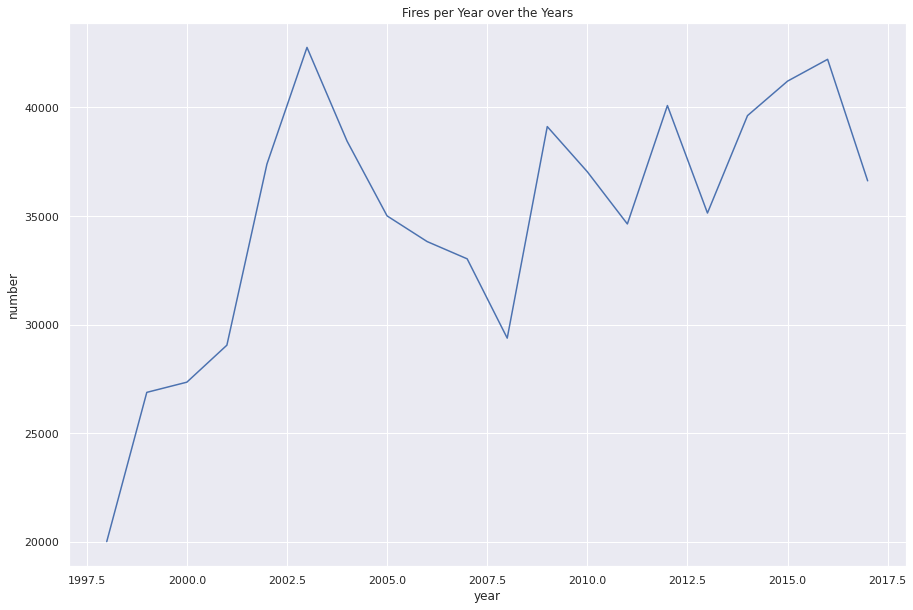

In [437]:
over_years_df=df.groupby('year').sum().reset_index()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=over_years_df, x= 'year', y = 'number')\
    .set(title='Fires per Year over the Years')


Fires in Brazil over the years. it is possible to see that there has been an increase of fires over the years.

Text(0, 0.5, 'Fires Brazil')

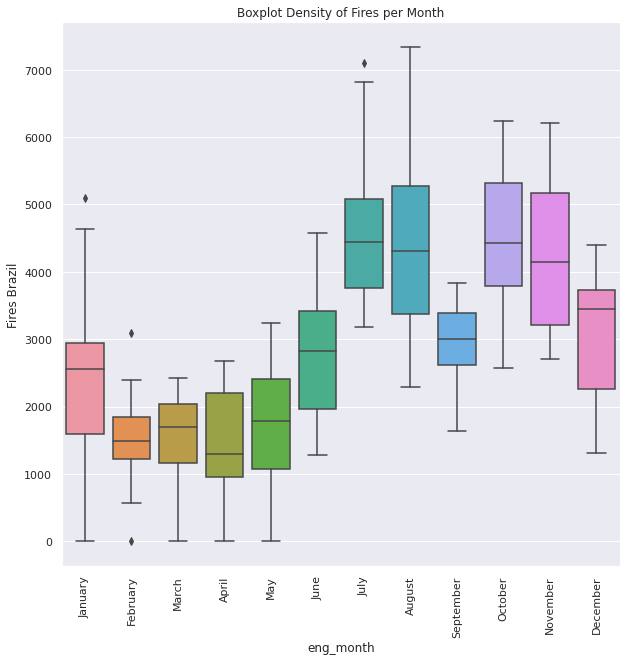

In [438]:
#Boxplots over the months 
year_df=year_df.reset_index(['date', 'eng_month', 'year'])
plt.figure(figsize=(10,10))
sns.boxplot(data=year_df, x='eng_month', y='number')
plt.xticks(rotation=90)
plt.title('Boxplot Density of Fires per Month')
plt.ylabel('Fires Brazil')

Box plot of the fires by month. It is easier to see which have more fires than others. 

Text(0, 0.5, 'Fires Brazil')

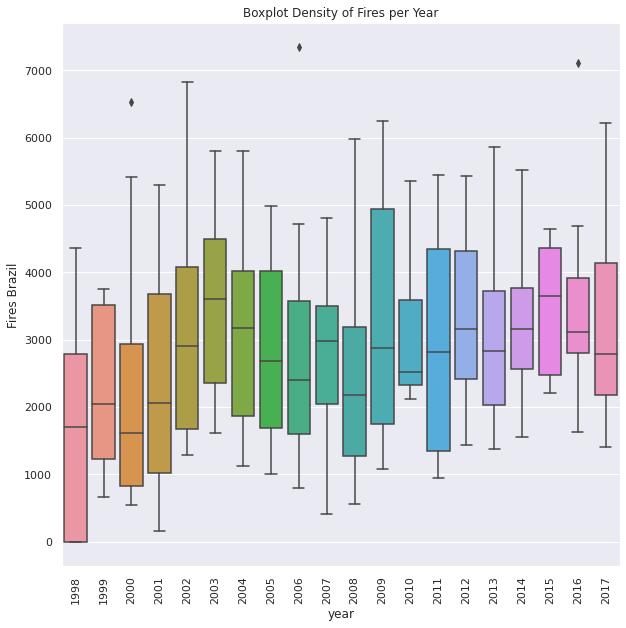

In [439]:
year_df=year_df.sort_values('date')
plt.figure(figsize=(10,10))
sns.boxplot(data=year_df, x='year', y='number')
plt.xticks(rotation=90)
plt.title('Boxplot Density of Fires per Year')
plt.ylabel('Fires Brazil')

Box plot of the fires of the years, it is possible to see that there is an increase of fires.